# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [39]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [40]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [5]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

In [6]:
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [7]:
dwelling_types = ["single_detached_house","apartment_five_storeys_plus","movable_dwelling","semi_detached_house","row_house","duplex","apartment_five_storeys_less","other_house"]
sum_to_data = to_data[dwelling_types].groupby(to_data.index).sum()

In [8]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
df_expen_neighbour =to_data.groupby(by="neighbourhood").mean()
df_expen_neighbour = df_expen_neighbour.sort_values(
    by="average_house_value",ascending=False
).head(10)
df_expen_neighbour =df_expen_neighbour.reset_index()


# Calculate the mean number of dwelling types units per year
# YOUR CODE HERE!
df_dwelling_units = to_data[dwelling_types].groupby(to_data.index).sum


# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!

df_avg_cost = (
    to_data[["shelter_costs_owned","shelter_costs_rented"]]
    .groupby([to_data.index]).mean()
)

### Panel Visualization Functions

In [29]:
# Define Panel visualization functions

def neighborhood_map():
    df_mean_value =to_data.groupby(by="neighbourhood").mean()
    df_mean_value =df_mean_value.reset_index()
    
    df_mean_value =pd.merge(
    df_neighbourhood_locations, df_mean_value, on ="neighbourhood")
    
    df_avg_value = (to_data["average_house_value"].groupby([to_data.index]).mean())
    
    px.set_mapbox_access_token(map_box_api)
    neighborhood_map = px.scatter_mapbox(
    df_mean_value,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color_continuous_scale= px.colors.cyclical.IceFire,
    size_max=15,
    zoom=9,
    color= "average_house_value",
    hover_name ="neighbourhood",
    hover_data = [
        "shelter_costs_owned",
        "shelter_costs_rented",
        "single_detached_house",
        "apartment_five_storeys_plus",
        "movable_dwelling",
        "semi_detached_house",
        "row_house",
        "duplex",
        "apartment_five_storeys_less",
        "other_house"
    ],
    title="Average House Values in Toronto",
    height=600
    )
    neighborhood_map = pn.pane.Plotly(neighborhood_map)
    neighborhood_map._updates = True
    return neighborhood_map   
    

    
    
    

def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    
    fig =plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel,fontsize = 20)
    bar_chart.set_ylabel(ylabel,fontsize = 20)
    bar_chart.set_title(title, fontsize = 20,fontweight="bold")
    plt.show()
    plt.close(fig)
    return pn.pane.Matplotlib(fig, tight=True)
     





    
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
      # YOUR CODE HERE!
    fig_dwelling_types = plt.figure() 
    plot_dwelling_types = data.plot(color=color)
    plot_dwelling_types.set_xlabel(xlabel)
    plot_dwelling_types.set_ylabel(ylabel)
    plot_dwelling_types.set_title(title)
    plt.xticks(rotation=90)
    plt.show()
    plt.close(fig_dwelling_types)
    return pn.pane.Matplotlib(fig_dwelling_types, tight=True)





    
def average_house_value():   
    """Average house values per year."""
    # YOUR CODE HERE!
    df_avg_value = to_data[["neighbourhood","average_house_value"]]
    df_avg_value = df_avg_value.reset_index()
    
    fig =px.bar (df_avg_value,
    x="neighbourhood",
    y="average_house_value",
    color="average_house_value",
    height=1024,
    facet_row=to_data.index,
    title="Average House Values in Toronto per Neighbourhood",
    labels = {"neighbourhood":"Neighbourhoods",
             "average_house_value": "Avg. House Value"} 
    )
    return fig 







def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    # YOUR CODE HERE!
    df_avg_value = to_data[["neighbourhood","average_house_value"]]
    df_avg_value = df_avg_value.reset_index()
    average_value_by_neighbourhood = df_avg_value.hvplot.line(
    "year",
    "average_house_value",
    xlabel ="Year",
    ylabel="Avg.House Value",
    groupby="neighbourhood",
)
    return average_value_by_neighbourhood
           

    
    
    
    

def number_dwelling_types():
    """Number of dwelling types per year"""
    # YOUR CODE HERE!

    df_dwelling_types = to_data.reset_index()

    number_dwelling_types = df_dwelling_types.hvplot.bar(
    "year",
    dwelling_types,
    xlabel="Year",
    ylabel="Dwelling Type Units",
    groupby="neighbourhood",
    height =500,
    rot=90
)
    return number_dwelling_types



    

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    # YOUR CODE HERE!
    
    fig =px.bar (
     to_data,
    x="neighbourhood",
    y="average_house_value",
    color="average_house_value",
    height=1024,
    facet_row=to_data.index,
    title="Average House Values in Toronto per Neighbourhood",
    labels = {"neighbourhood":"Neighbourhoods",
             "average_house_value": "Avg. House Value"}
 
     )
    fig.show()
    return average_house_value_snapshot
    



    
    
    
    
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    # YOUR CODE HERE!
    df_expen_neighour = to_data.groupby(by="neighbourhood").mean()
    df_expen_neighour = df_expen_neighour.sort_values(by="average_house_value",ascending=False).head(10)
    df_expen_neighour = df_expen_neighour.reset_index()
    expensive_neighborhoods  = df_expen_neighour.hvplot.bar(
    "neighbourhood",
    "average_house_value",
    title="Top 10 Expensive Neighbourhoods in Toronto",
    xlabel ="Neighbourhood",
    ylabel ="Avg.House Value",
    height=500,
    rot=90,
    )
    return expensive_neighborhoods 








def sunburts_cost_analysis():   
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""  
    # YOUR CODE HERE!
    df_expen_neighour = to_data.groupby(by="neighbourhood").mean()
    df_expen_neighour = df_expen_neighour.sort_values(by="average_house_value",ascending=False).head(10)
    df_expen_neighour = df_expen_neighour.reset_index()
    df_expen_neighour_per_year = to_data[to_data["neighbourhood"].isin(df_expen_neighour["neighbourhood"])]
    df_expen_neighour_per_year = df_expen_neighour_per_year.reset_index()
    
    fig = px.sunburst(
    df_expen_neighour_per_year,
    path=["year","neighbourhood"],
    values="average_house_value",
    color="shelter_costs_owned",
    hover_data=["shelter_costs_owned","shelter_costs_rented"],
    color_continuous_scale="Blues",
    title="Costs Analysis of Most expensive Neighbourhoods in Toronto per Year")
    plotly_panel_sunburst = pn.pane.Plotly(fig)
    plotly_panel_sunburst._updates = True
    return plotly_panel_sunburst
    
   



## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

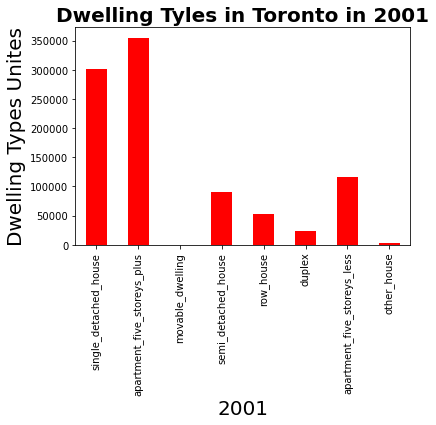

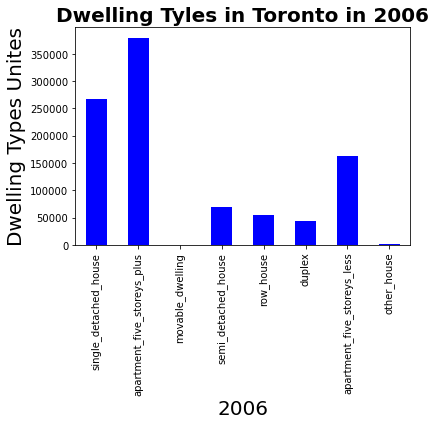

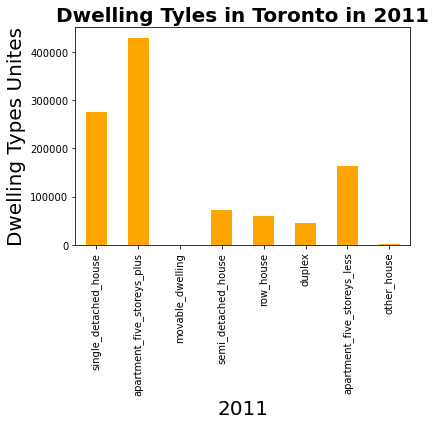

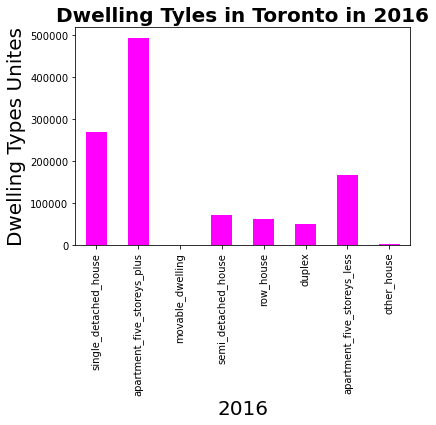

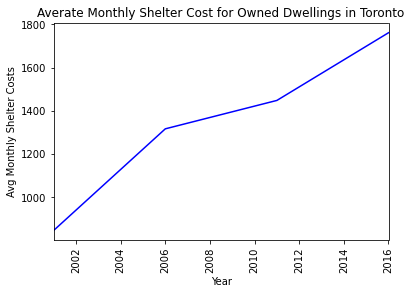

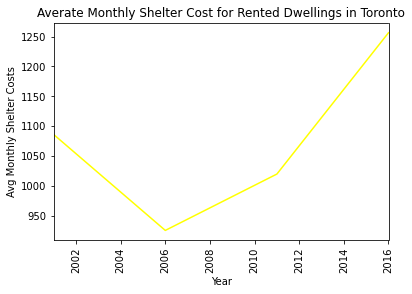

In [35]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
title =pn.pane.Markdown(
    """
# Real Estate Analysis of Toronto from 2001 to 2016
""", 
    width=800,
)

# Define a welcome text
# YOUR CODE HERE!
welcome =pn.pane.Markdown(
    """
This dashboard presents a visual analysis of historical house values,
dwelling types per neighbourhood and dwelling costs in Toronto,Ontario
according to census data from 2001 to 2016. You can navigate through the tabs above
to explore more details about the evolution of the real estate martet on The 6 across these years.

""", 
    width=1024,
)

# Create a tab layout for the dashboard
# YOUR CODE HERE!
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Market Analysis", pn.Column(create_bar_chart(
        sum_to_data.loc[2001], "Dwelling Tyles in Toronto in 2001","2001","Dwelling Types Unites", "Red"),create_bar_chart(
        sum_to_data.loc[2006], "Dwelling Tyles in Toronto in 2006","2006","Dwelling Types Unites", "blue"),create_bar_chart(
        sum_to_data.loc[2011], "Dwelling Tyles in Toronto in 2011","2011","Dwelling Types Unites", "orange"),create_bar_chart(
        sum_to_data.loc[2016], "Dwelling Tyles in Toronto in 2016","2016","Dwelling Types Unites", "magenta"))),   
    ("Shelter Costs Vs House Value", pn.Column(create_line_chart(df_avg_cost["shelter_costs_owned"],"Averate Monthly Shelter Cost for Owned Dwellings in Toronto","Year","Avg Monthly Shelter Costs", "blue"),
                                               create_line_chart(df_avg_cost["shelter_costs_rented"],"Averate Monthly Shelter Cost for Rented Dwellings in Toronto","Year","Avg Monthly Shelter Costs", "yellow")
)),
    ("Neighborhood Analysis", pn.Column(average_value_by_neighbourhood(),number_dwelling_types(),average_house_value())),
    ("Top Expensive Neighborhoods", pn.Column(top_most_expensive_neighbourhoods(),sunburts_cost_analysis())),
)


# Create the main dashboard
# YOUR CODE HERE!
     
dashboard = pn.Column(pn.Row(title), tabs, width=900)

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=1024)
            [1] Plotly(Figure)
        [1] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
            [3] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
        [3] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
            [2] Plotly(Figure)
        [4] Column
            [0] HoloViews(Bars)
            [1] Plotly(Figure)
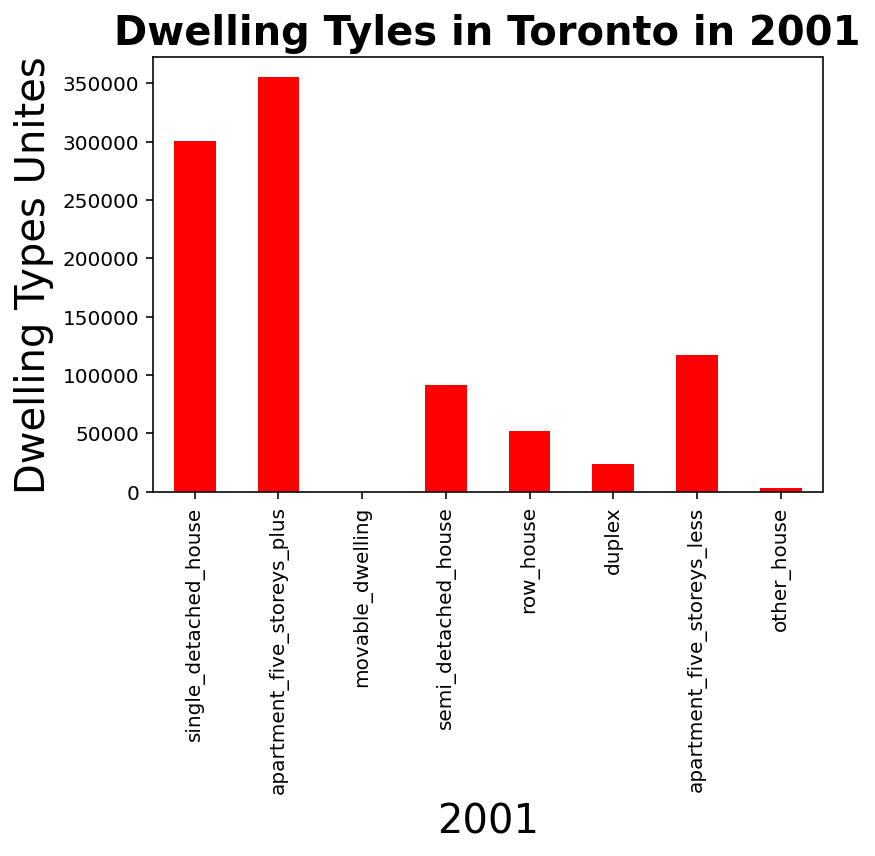
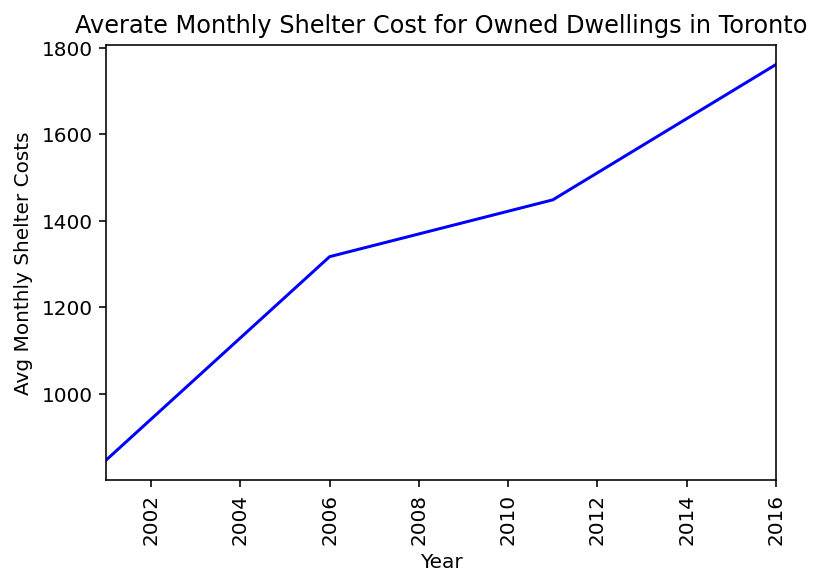
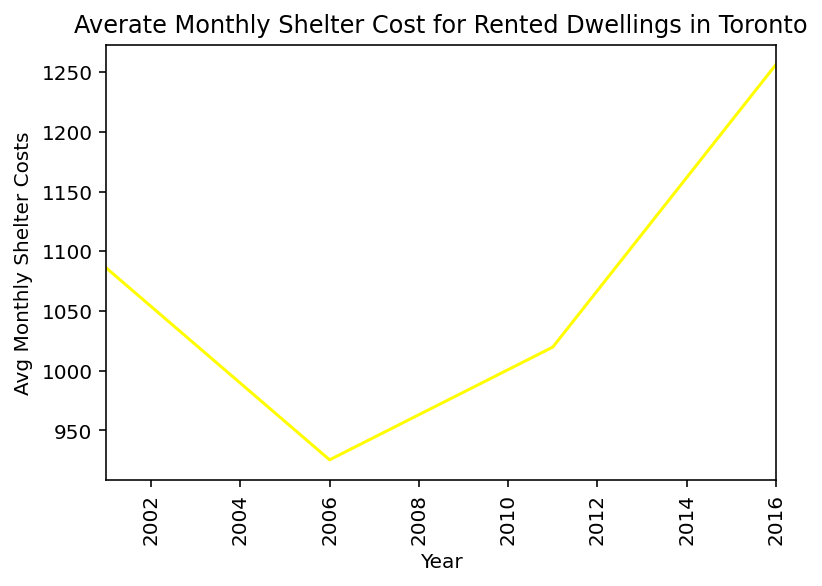
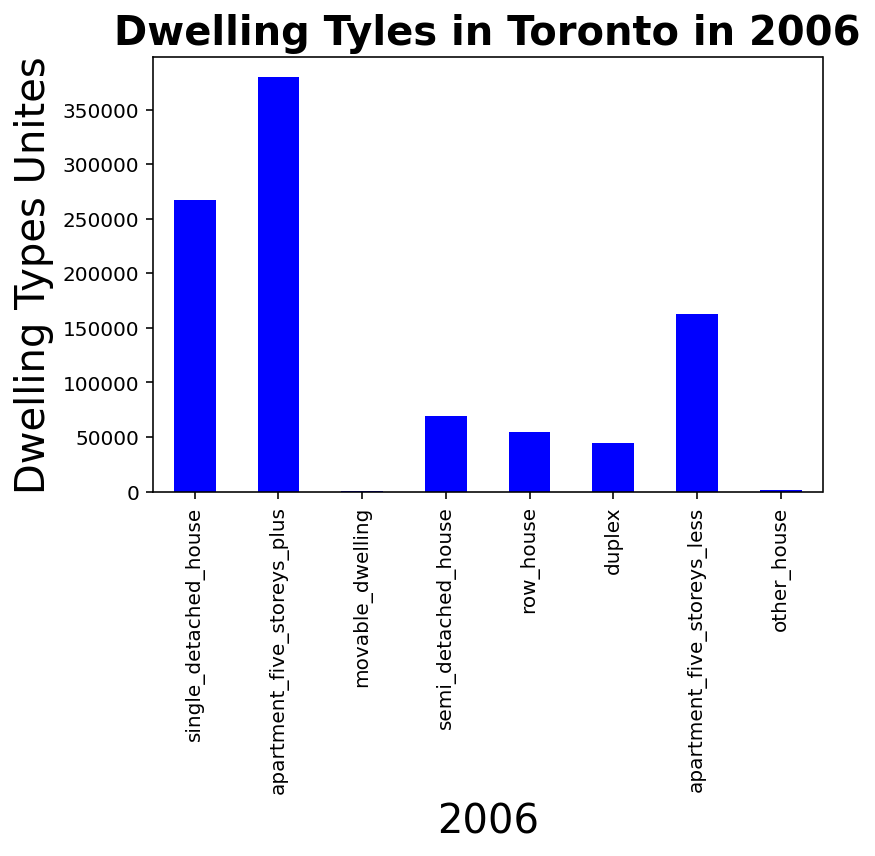
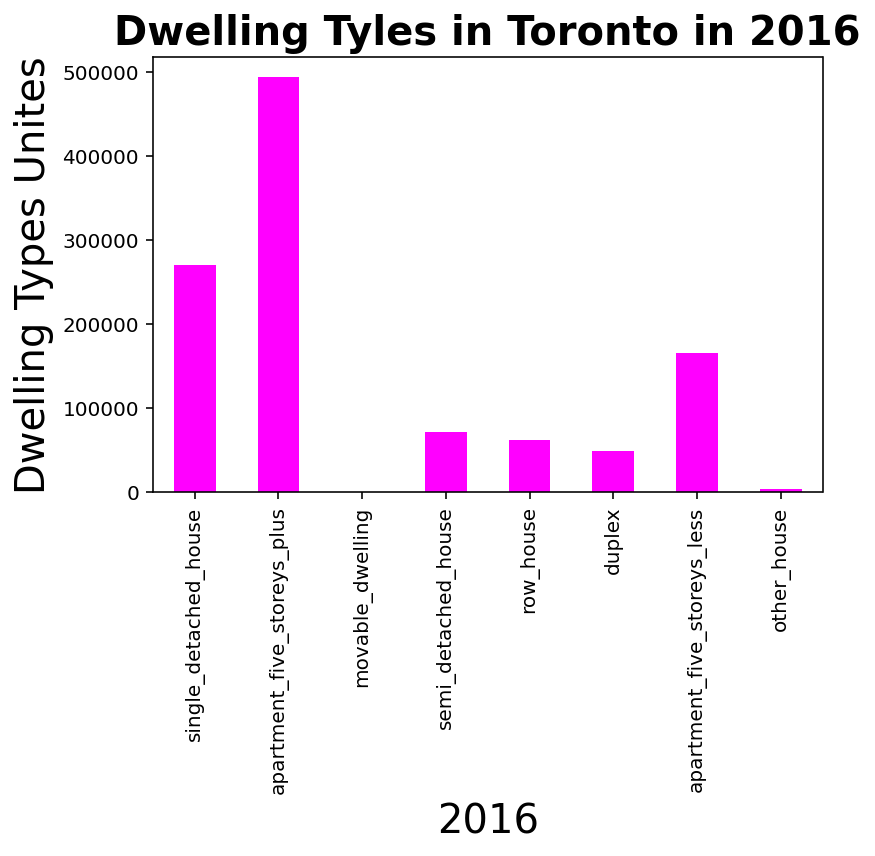
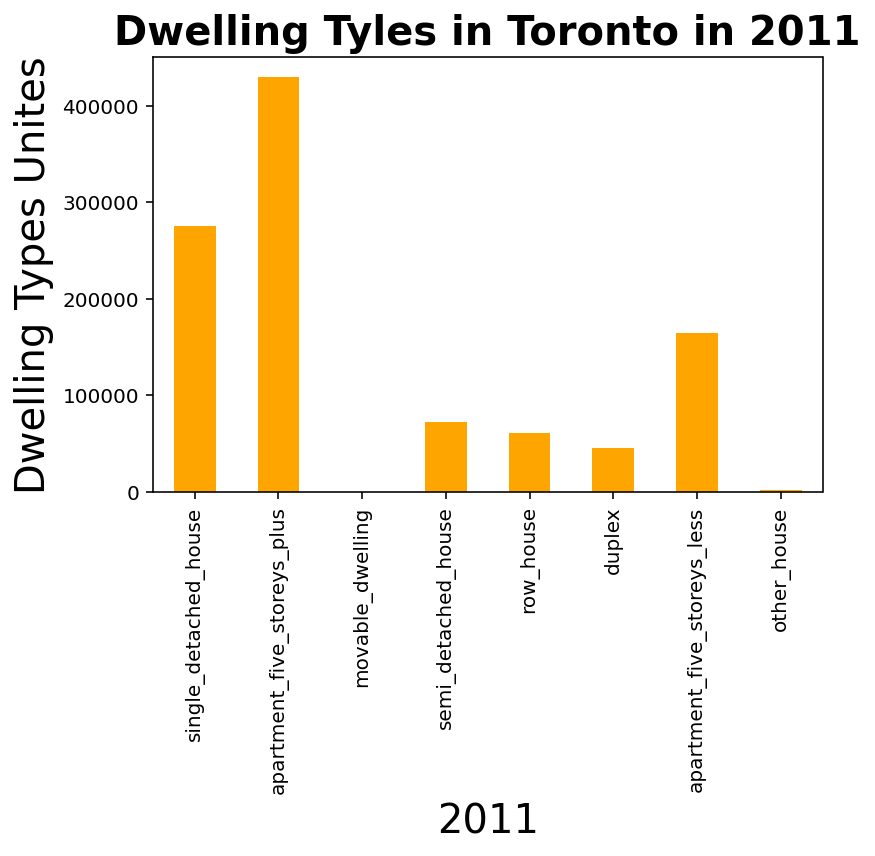

In [36]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [12]:
# neighbourhood_map().show()
neighborhood_map()

Plotly(Figure)

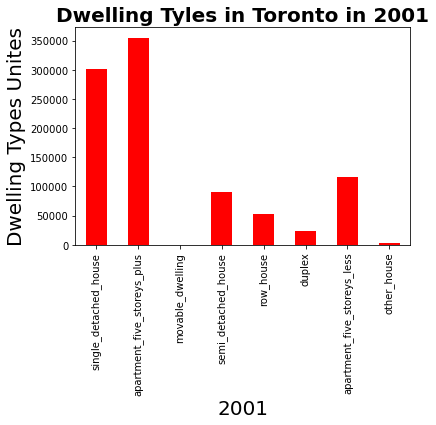

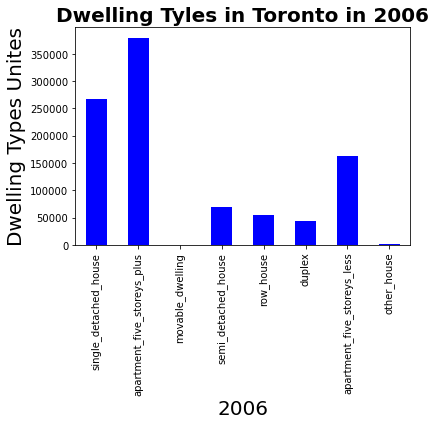

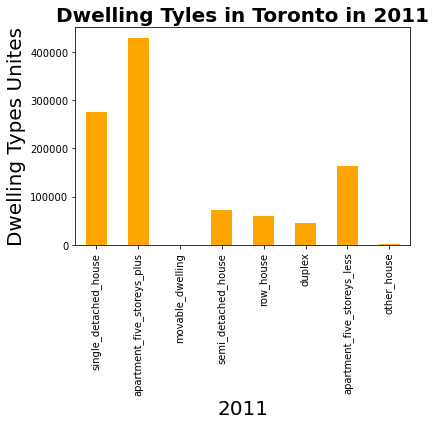

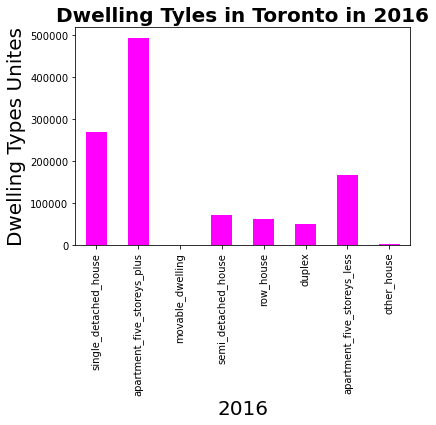

In [26]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")
create_bar_chart(sum_to_data.loc[2001], "Dwelling Tyles in Toronto in 2001","2001","Dwelling Types Unites", "Red")
# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")
create_bar_chart(sum_to_data.loc[2006], "Dwelling Tyles in Toronto in 2006","2006","Dwelling Types Unites", "blue")
# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")
create_bar_chart(sum_to_data.loc[2011], "Dwelling Tyles in Toronto in 2011","2011","Dwelling Types Unites", "orange")
# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")
create_bar_chart(sum_to_data.loc[2016], "Dwelling Tyles in Toronto in 2016","2016","Dwelling Types Unites", "magenta");

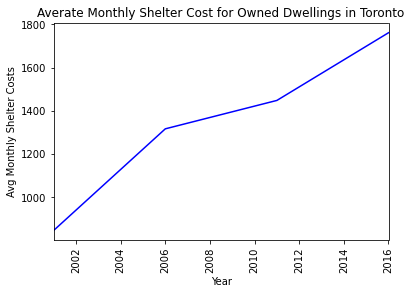

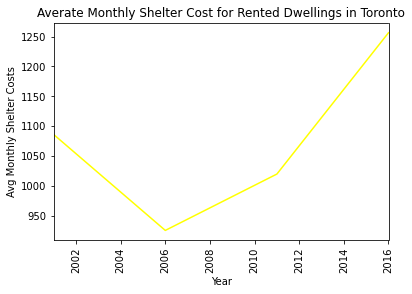

In [31]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue"
create_line_chart(df_avg_cost["shelter_costs_owned"],"Averate Monthly Shelter Cost for Owned Dwellings in Toronto","Year","Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")
create_line_chart(df_avg_cost["shelter_costs_rented"],"Averate Monthly Shelter Cost for Rented Dwellings in Toronto","Year","Avg Monthly Shelter Costs", "yellow");


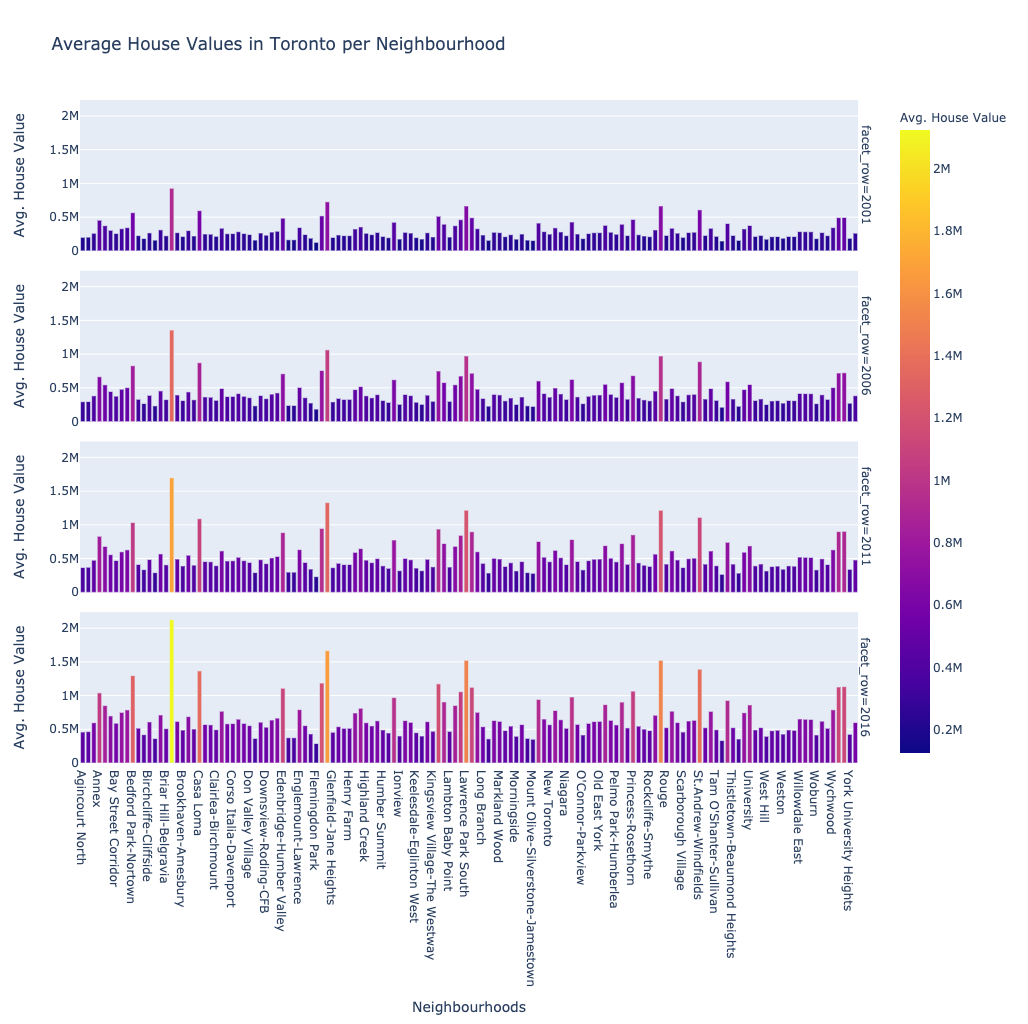

In [32]:
# average_house_value()
average_house_value()

In [17]:
# average_value_by_neighbourhood()
average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [18]:
# number_dwelling_types()
number_dwelling_types()

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

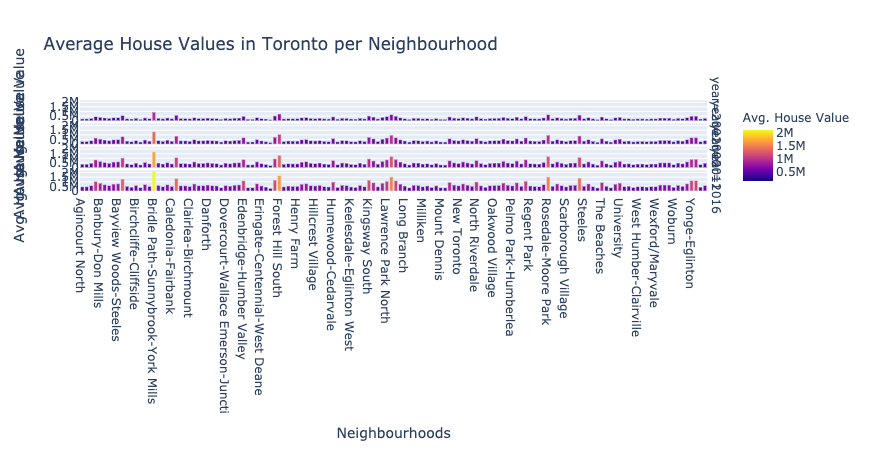

<function __main__.average_house_value_snapshot()>

In [19]:
# average_house_value_snapshot()
average_house_value_snapshot()

In [20]:
# top_most_expensive_neighbourhoods()
top_most_expensive_neighbourhoods()

:Bars   [neighbourhood]   (average_house_value)

In [21]:
# sunburts_cost_analysis()
sunburts_cost_analysis()

Plotly(Figure)